In [51]:
from mpl_toolkits import mplot3d
import numpy as np
from math import *
import matplotlib.pyplot as plt

def setupView(limit):
    ax = plt.axes(projection="3d")
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    return ax

36.869910829198254
-48.28133671964265
133.43258426848357
[[  0.           0.           0.           1.        ]
 [ -8.           6.           0.           1.        ]
 [-14.          -2.           0.           1.        ]
 [-45.94274005 -44.59032006 -59.71370023   1.        ]
 [-50.         -50.          20.           1.        ]]


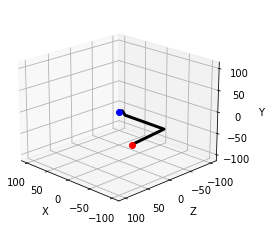

OK


In [82]:
%matplotlib inline

setupView(110).view_init(elev=20., azim=135)

l1=10
l2=10
l3=80
l4=80

x=-50
y=-50
z=20

def legIK(x,y,z):

    """
    x/y/z=Position of the Foot in Leg-Space

    F=Length of shoulder-point to target-point on x/y only
    G=length we need to reach to the point on x/y
    H=3-Dimensional length we need to reach
    """

    F=sqrt(x**2+y**2-l1**2)
    G=F-l2  
    H=sqrt(G**2+z**2)

    theta1=-atan2(y,x)-atan2(F,-l1)

    D=(H**2-l3**2-l4**2)/(2*l3*l4)
    theta3=acos(D) 

    theta2=atan2(z,G)-atan2(l4*sin(theta3),l3+l4*cos(theta3))

    return(theta1,theta2,theta3)

def calcLegPoints(angles):

    (theta1,theta2,theta3)=angles
    print(angles[0]*57.2958)
    print(angles[1]*57.2958)
    print(angles[2]*57.2958)
    theta23=theta2+theta3

    T0=np.array([0,0,0,1])
    T1=T0+np.array([-l1*cos(theta1),l1*sin(theta1),0,0])
    T2=T1+np.array([-l2*sin(theta1),-l2*cos(theta1),0,0])
    T3=T2+np.array([-l3*sin(theta1)*cos(theta2),-l3*cos(theta1)*cos(theta2),l3*sin(theta2),0])
    T4=T3+np.array([-l4*sin(theta1)*cos(theta23),-l4*cos(theta1)*cos(theta23),l4*sin(theta23),0])

    return np.array([T0,T1,T2,T3,T4])

def drawLegPoints(p):

    plt.plot([p[0][0],p[1][0],p[2][0],p[3][0],p[4][0]], 
             [p[0][2],p[1][2],p[2][2],p[3][2],p[4][2]],
             [p[0][1],p[1][1],p[2][1],p[3][1],p[4][1]], 'k-', lw=3)
    plt.plot([p[0][0]],[p[0][2]],[p[0][1]],'bo',lw=2)
    plt.plot([p[4][0]],[p[4][2]],[p[4][1]],'ro',lw=2)
    
    print(p)
    
    plt.show()

# def new_func():
#     for i range(0,3):        print(i)
#     return i


drawLegPoints(calcLegPoints(legIK(x,y,z)))


print("OK")


16.260210522378507
-112.50789664515001
93.47123689060544
[[   0.            0.            0.            1.        ]
 [  -9.6           2.8           0.            1.        ]
 [ -12.4          -6.8           0.            1.        ]
 [  -3.8250535    22.59981656  -73.90616401    1.        ]
 [ -25.          -50.         -100.            1.        ]]


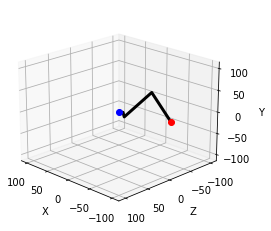

58.303421720817695
-71.75455236329914
54.280356936052726
[[   0.            0.            0.            1.        ]
 [  -5.25421149    8.50842298    0.            1.        ]
 [ -13.76263447    3.25421149    0.            1.        ]
 [ -35.0737682    -9.90606557  -75.9779092     1.        ]
 [-100.          -50.         -100.            1.        ]]


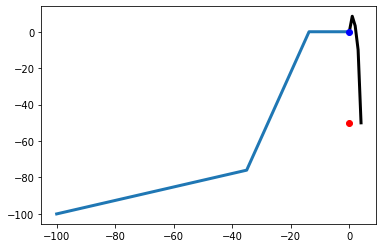

16.260210522378507
-113.15135808874126
130.2771068338111
[[  0.           0.           0.           1.        ]
 [ -9.6          2.8          0.           1.        ]
 [-12.4         -6.8          0.           1.        ]
 [ -3.5931979   23.39475005 -73.55757817   1.        ]
 [-25.         -50.         -50.           1.        ]]


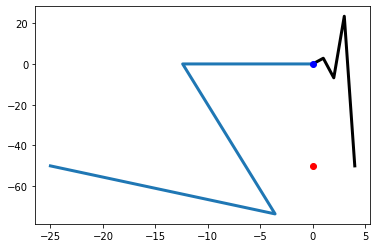

58.303421720817695
-71.31846811507363
90.12136393957807
[[   0.            0.            0.            1.        ]
 [  -5.25421149    8.50842298    0.            1.        ]
 [ -13.76263447    3.25421149    0.            1.        ]
 [ -35.56516762  -10.20951974  -75.78507432    1.        ]
 [-100.          -50.          -50.            1.        ]]


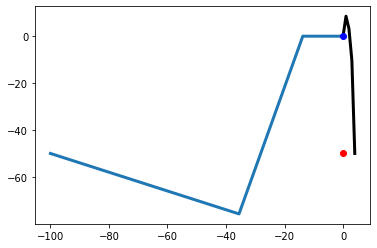

16.260210522378507
-73.66520355934175
147.3304071186835
[[  0.           0.           0.           1.        ]
 [ -9.6          2.8          0.           1.        ]
 [-12.4         -6.8          0.           1.        ]
 [-18.7        -28.4        -76.77076266   1.        ]
 [-25.         -50.           0.           1.        ]]


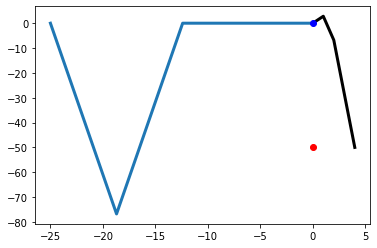

58.303421720817695
-50.69337836720462
101.38675673440923
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-5.25421149e+00  8.50842298e+00  0.00000000e+00  1.00000000e+00]
 [-1.37626345e+01  3.25421149e+00  0.00000000e+00  1.00000000e+00]
 [-5.68813172e+01 -2.33728943e+01 -6.19013444e+01  1.00000000e+00]
 [-1.00000000e+02 -5.00000000e+01 -1.42108547e-14  1.00000000e+00]]


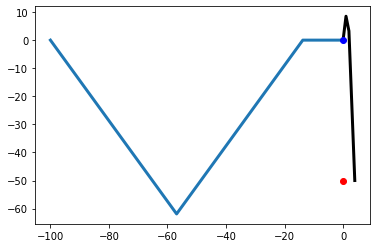

16.260210522378507
-17.125748745069835
130.2771068338111
[[  0.           0.           0.           1.        ]
 [ -9.6          2.8          0.           1.        ]
 [-12.4         -6.8          0.           1.        ]
 [-33.8068021  -80.19475005 -23.55757817   1.        ]
 [-25.         -50.          50.           1.        ]]


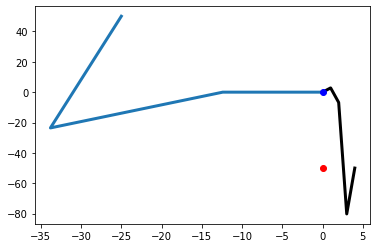

58.303421720817695
-18.802895824504454
90.12136393957807
[[   0.            0.            0.            1.        ]
 [  -5.25421149    8.50842298    0.            1.        ]
 [ -13.76263447    3.25421149    0.            1.        ]
 [ -78.19746685  -36.53626877  -25.78507432    1.        ]
 [-100.          -50.           50.            1.        ]]


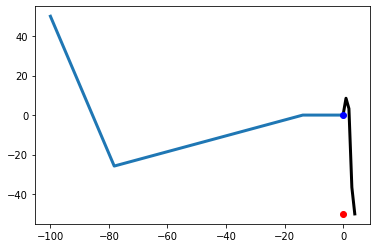

16.260210522378507
19.03665975454457
93.47123689060544
[[  0.           0.           0.           1.        ]
 [ -9.6          2.8          0.           1.        ]
 [-12.4         -6.8          0.           1.        ]
 [-33.5749465  -79.39981656  26.09383599   1.        ]
 [-25.         -50.         100.           1.        ]]


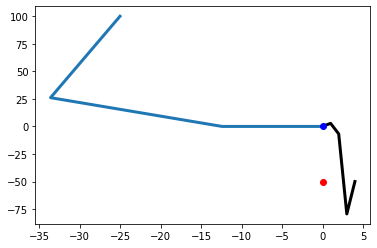

58.303421720817695
17.474195427246414
54.280356936052726
[[   0.            0.            0.            1.        ]
 [  -5.25421149    8.50842298    0.            1.        ]
 [ -13.76263447    3.25421149    0.            1.        ]
 [ -78.68886627  -36.83972294   24.0220908     1.        ]
 [-100.          -50.          100.            1.        ]]


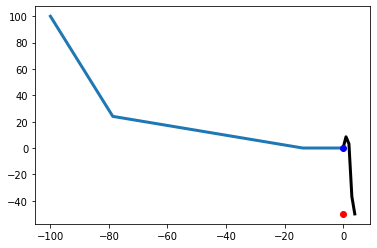

OK


In [83]:
%matplotlib inline

setupView(110).view_init(elev=20., azim=135)

for z in range(-100,150,50):
    drawLegPoints(calcLegPoints(legIK(x+25,y,z)))
    drawLegPoints(calcLegPoints(legIK(x-50,y,z)))

print("OK")

OK


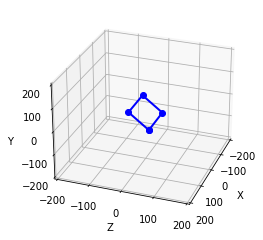

In [85]:
%matplotlib inline

L = 120
W = 90

def bodyIK(omega,phi,psi,xm,ym,zm):

    """
    Calculate the four Transformation-Matrices for our Legs
    Rx=X-Axis Rotation Matrix
    Ry=Y-Axis Rotation Matrix
    Rz=Z-Axis Rotation Matrix
    Rxyz=All Axis Rotation Matrix
    T=Translation Matrix
    Tm=Transformation Matrix
    Trb,Trf,Tlb,Tlf=final Matrix for RightBack,RightFront,LeftBack and LeftFront
    """

    Rx = np.array([
        [1, 0, 0, 0], 
        [0, np.cos(omega), -np.sin(omega), 0],
        [0,np.sin(omega),np.cos(omega),0],
        [0,0,0,1]])

    Ry = np.array([
        [np.cos(phi),0, np.sin(phi), 0], 
        [0, 1, 0, 0],
        [-np.sin(phi),0, np.cos(phi),0],
        [0,0,0,1]])

    Rz = np.array([
        [np.cos(psi),-np.sin(psi), 0,0], 
        [np.sin(psi),np.cos(psi),0,0],
        [0,0,1,0],
        [0,0,0,1]])

    Rxyz=Rx@Ry@Rz

    T = np.array([[0,0,0,xm],[0,0,0,ym],[0,0,0,zm],[0,0,0,0]])
    Tm = T+Rxyz

    Trb = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),-L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),-W/2],
        [0,0,0,1]])

    Trf = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),-W/2],
        [0,0,0,1]])

    Tlf = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),W/2],
        [0,0,0,1]])

    Tlb = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),-L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),W/2],
        [0,0,0,1]])

    return (Tlf,Trf,Tlb,Trb,Tm)

omega =  pi/4 # Body xrot
phi =0#math.pi/4# Body YRot
psi = 0#math.pi/6 # Body ZRot

xm = 0
ym = 0
zm = 0

(Tlf,Trf,Tlb,Trb,Tm)=bodyIK(omega,phi,psi,xm,ym,zm)

FP=[0,0,0,1]

CP=[x@FP for x in [Tlf,Trf,Tlb,Trb]]

setupView(200).view_init(elev=27., azim=20)
plt.plot([CP[0][0],CP[1][0],CP[3][0], CP[2][0],CP[0][0]],
         [CP[0][2],CP[1][2],CP[3][2], CP[2][2],CP[0][2]],
         [CP[0][1],CP[1][1],CP[3][1], CP[2][1],CP[0][1]], 'bo-', lw=2)

print("OK")

67.12180618662745
-24.760855793981676
107.42391883333649
[array([ 59.48007528, -33.92307351,  30.5997668 ,   1.        ]), array([ 63.43811786, -26.85336234,  36.46091711,   1.        ]), array([ 62.85152367, -33.02806199,  44.30495889,   1.        ]), array([ 27.8828228 , -66.32945268, 108.08745914,   1.        ]), array([ 100., -100.,  100.,    1.])]


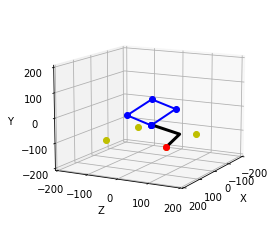

29.073482476483804
-52.000757851249155
86.74057047921669
[array([-50.49506778,   7.45912822,  54.95097393,   1.        ]), array([-47.73967649,   9.22083874,  64.40106361,   1.        ]), array([-5.06410577e+01,  1.07151119e-03,  6.69658013e+01,  1.00000000e+00]), array([-122.70594981,  -23.66825675,   92.39047866,    1.        ]), array([-100., -100.,  100.,    1.])]


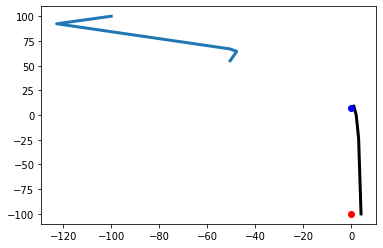

0.5180924653823089
5.711522843109788
95.54077277652924
[array([ 50.49506778,  -7.45912822, -54.95097393,   1.        ]), array([ 49.53181086,  -4.43820597, -64.43496913,   1.        ]), array([ 45.64821331, -13.32537428, -66.87134133,   1.        ]), array([ 22.03014309, -86.81533005, -87.88117617,   1.        ]), array([ 100., -100., -100.,    1.])]


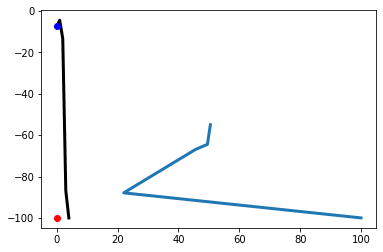

7.727675983066735
-15.044864078811058
48.324381786604725
[array([-59.48007528,  33.92307351, -30.5997668 ,   1.        ]), array([-59.94832831,  38.03544344, -39.70301637,   1.        ]), array([-63.92210899,  29.59766261, -43.31035912,   1.        ]), array([-113.65389142,  -28.42960621,  -66.96592695,    1.        ]), array([-100., -100., -100.,    1.])]


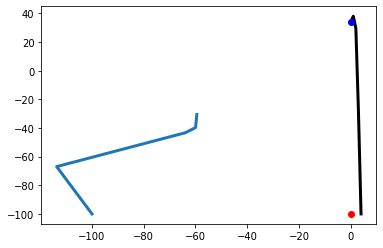

OK


In [87]:
# %matplotlib inline
setupView(200).view_init(elev=12., azim=28)

Lp=np.array([[100,-100,100,1],[100,-100,-100,1],[-100,-100,100,1],[-100,-100,-100,1]])


def drawRobot(Lp,bodyIk):

    (Tlf,Trf,Tlb,Trb,Tm)=bodyIk

    FP=[0,0,0,1]
    CP=[x@FP for x in [Tlf,Trf,Tlb,Trb]]

    [plt.plot([x[0]],[x[2]],[x[1]],'yo-') for x in Lp]

    plt.plot([CP[0][0],CP[1][0],CP[3][0],CP[2][0],CP[0][0]],
             [CP[0][2],CP[1][2],CP[3][2],CP[2][2],CP[0][2]],
             [CP[0][1],CP[1][1],CP[3][1],CP[2][1],CP[0][1]], 'bo-', lw=2)

    # Invert local X
    Ix=np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

    #Q=np.linalg.inv(Tlf)@(Lp[0])
    Q=np.linalg.inv(Tlf)@Lp[0]
    p=[Tlf@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

    Q=np.linalg.inv(Tlb)@Lp[2]
    p=[Tlb@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

    #TP=np.array([40,-150,0,1])

    Q=Ix@np.linalg.inv(Trf)@Lp[1]
    p=[Trf@Ix@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

    Q=Ix@np.linalg.inv(Trb)@Lp[3]
    p=[Trb@Ix@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

drawRobot(Lp,bodyIK(0.3,0.1,-0.4,xm,ym,zm))

print("OK")

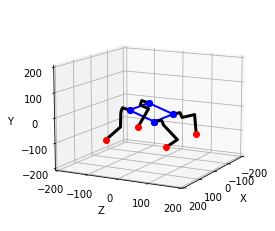

In [88]:
%matplotlib inline
setupView(200).view_init(elev=12., azim=28)

omega =  pi/4
phi =0
psi = 0

xm = 0
ym = 0
zm = 0

l1=25
l2=20
l3=80
l4=80

L = 120
W = 90

Lp=np.array([[100,-100,100,1],[100,-100,-100,1],[-100,-100,100,1],[-100,-100,-100,1]])

sHp=np.sin(pi/2)
cHp=np.cos(pi/2)

Lo=np.array([0,0,0,1])

def bodyIK(omega,phi,psi,xm,ym,zm):
    Rx = np.array([[1,0,0,0],
                   [0,np.cos(omega),-np.sin(omega),0],
                   [0,np.sin(omega),np.cos(omega),0],[0,0,0,1]])
    Ry = np.array([[np.cos(phi),0,np.sin(phi),0],
                   [0,1,0,0],
                   [-np.sin(phi),0,np.cos(phi),0],[0,0,0,1]])
    Rz = np.array([[np.cos(psi),-np.sin(psi),0,0],
                   [np.sin(psi),np.cos(psi),0,0],[0,0,1,0],[0,0,0,1]])
    Rxyz=Rx@Ry@Rz

    T = np.array([[0,0,0,xm],[0,0,0,ym],[0,0,0,zm],[0,0,0,0]])
    Tm = T+Rxyz

    return([Tm @ np.array([[cHp,0,sHp,L/2],[0,1,0,0],[-sHp,0,cHp,W/2],[0,0,0,1]]),
           Tm @ np.array([[cHp,0,sHp,L/2],[0,1,0,0],[-sHp,0,cHp,-W/2],[0,0,0,1]]),
           Tm @ np.array([[cHp,0,sHp,-L/2],[0,1,0,0],[-sHp,0,cHp,W/2],[0,0,0,1]]),
           Tm @ np.array([[cHp,0,sHp,-L/2],[0,1,0,0],[-sHp,0,cHp,-W/2],[0,0,0,1]])
           ])

def legIK(point):
    (x,y,z)=(point[0],point[1],point[2])
    F=sqrt(x**2+y**2-l1**2)
    G=F-l2  
    H=sqrt(G**2+z**2)
    theta1=-atan2(y,x)-atan2(F,-l1)

    D=(H**2-l3**2-l4**2)/(2*l3*l4)
    theta3=acos(D) 

    theta2=atan2(z,G)-atan2(l4*sin(theta3),l3+l4*cos(theta3))

    return(theta1,theta2,theta3)

def calcLegPoints(angles):
    (theta1,theta2,theta3)=angles
    theta23=theta2+theta3

    T0=Lo
    T1=T0+np.array([-l1*cos(theta1),l1*sin(theta1),0,0])
    T2=T1+np.array([-l2*sin(theta1),-l2*cos(theta1),0,0])
    T3=T2+np.array([-l3*sin(theta1)*cos(theta2),-l3*cos(theta1)*cos(theta2),l3*sin(theta2),0])
    T4=T3+np.array([-l4*sin(theta1)*cos(theta23),-l4*cos(theta1)*cos(theta23),l4*sin(theta23),0])

    return np.array([T0,T1,T2,T3,T4])

def drawLegPoints(p):
    plt.plot([x[0] for x in p],[x[2] for x in p],[x[1] for x in p], 'k-', lw=3)
    plt.plot([p[0][0]],[p[0][2]],[p[0][1]],'bo',lw=2)
    plt.plot([p[4][0]],[p[4][2]],[p[4][1]],'ro',lw=2)    

def drawLegPair(Tl,Tr,Ll,Lr):
    Ix=np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    drawLegPoints([Tl@x for x in calcLegPoints(legIK(np.linalg.inv(Tl)@Ll))])
    drawLegPoints([Tr@Ix@x for x in calcLegPoints(legIK(Ix@np.linalg.inv(Tr)@Lr))])

def drawRobot(Lp,angles,center):
    (omega,phi,psi)=angles
    (xm,ym,zm)=center

    FP=[0,0,0,1]
    (Tlf,Trf,Tlb,Trb)= bodyIK(omega,phi,psi,xm,ym,zm)
    CP=[x@FP for x in [Tlf,Trf,Tlb,Trb]]

    CPs=[CP[x] for x in [0,1,3,2,0]]
    plt.plot([x[0] for x in CPs],[x[2] for x in CPs],[x[1] for x in CPs], 'bo-', lw=2)

    drawLegPair(Tlf,Trf,Lp[0],Lp[1])
    drawLegPair(Tlb,Trb,Lp[2],Lp[3])

drawRobot(Lp,(0.4,0,0),(0,0,0))

In [6]:

def ik_x(x,z):
    print("X-axis:"+str(x)+"; "+"Z-axis:"+str(z))

j=0
l=104
for i in range(40,0,-1):
    j=j+1
    l

    print("first leg:"+str(i))
    ik_x(j,l)
    # print("first loop:"+str(i))
    # print("Second loop:"+str(j))
    # for j in range(0,40,1):
    #     
    #     break

X-axis:40; Z-axis:1
X-axis:39; Z-axis:2
X-axis:38; Z-axis:3
X-axis:37; Z-axis:4
X-axis:36; Z-axis:5
X-axis:35; Z-axis:6
X-axis:34; Z-axis:7
X-axis:33; Z-axis:8
X-axis:32; Z-axis:9
X-axis:31; Z-axis:10
X-axis:30; Z-axis:11
X-axis:29; Z-axis:12
X-axis:28; Z-axis:13
X-axis:27; Z-axis:14
X-axis:26; Z-axis:15
X-axis:25; Z-axis:16
X-axis:24; Z-axis:17
X-axis:23; Z-axis:18
X-axis:22; Z-axis:19
X-axis:21; Z-axis:20
X-axis:20; Z-axis:21
X-axis:19; Z-axis:22
X-axis:18; Z-axis:23
X-axis:17; Z-axis:24
X-axis:16; Z-axis:25
X-axis:15; Z-axis:26
X-axis:14; Z-axis:27
X-axis:13; Z-axis:28
X-axis:12; Z-axis:29
X-axis:11; Z-axis:30
X-axis:10; Z-axis:31
X-axis:9; Z-axis:32
X-axis:8; Z-axis:33
X-axis:7; Z-axis:34
X-axis:6; Z-axis:35
X-axis:5; Z-axis:36
X-axis:4; Z-axis:37
X-axis:3; Z-axis:38
X-axis:2; Z-axis:39
X-axis:1; Z-axis:40


In [2]:
def ik_x(x,z):
    print("Front Leg:"+str(x)+"; "+"Z-axis:"+str(z))

walking=True
stepLenth=0
B=5
Z=5
print("------1-2------")
for i in range(10,5,-1):
    Z=Z+1
    print("Back Z:"+str(Z)) # leg function
    ik_x(0,i)
print("------2-3------")
for j in range(0,-5,-1):  # linear
    B=B-1
    print("Back leg:"+str(B)) # leg function
    ik_x(j,i)
print("------3-4------")
for k in range(5,10,1):
    Z=Z-1
    print("Back Z:"+str(Z)) # leg function
    ik_x(j,k)
print("------4-1------")
for l in range(-5,0,1):  # linear
    B=B+1
    print("Back leg:"+str(B))
    ik_x(l,k)

        

------1-2------
Back Z:6
Front Leg:0; Z-axis:10
Back Z:7
Front Leg:0; Z-axis:9
Back Z:8
Front Leg:0; Z-axis:8
Back Z:9
Front Leg:0; Z-axis:7
Back Z:10
Front Leg:0; Z-axis:6
------2-3------
Back leg:4
Front Leg:0; Z-axis:6
Back leg:3
Front Leg:-1; Z-axis:6
Back leg:2
Front Leg:-2; Z-axis:6
Back leg:1
Front Leg:-3; Z-axis:6
Back leg:0
Front Leg:-4; Z-axis:6
------3-4------
Back Z:9
Front Leg:-4; Z-axis:5
Back Z:8
Front Leg:-4; Z-axis:6
Back Z:7
Front Leg:-4; Z-axis:7
Back Z:6
Front Leg:-4; Z-axis:8
Back Z:5
Front Leg:-4; Z-axis:9
------4-1------
Back leg:1
Front Leg:-5; Z-axis:9
Back leg:2
Front Leg:-4; Z-axis:9
Back leg:3
Front Leg:-3; Z-axis:9
Back leg:4
Front Leg:-2; Z-axis:9
Back leg:5
Front Leg:-1; Z-axis:9


In [8]:
def ik_x(x,z):
    print("Front Leg:"+str(x)+"; "+"Z-axis:"+str(z))

walking=True
minHeight=10
walkHeight=5
minStepLegth=10
defaultStepStart=0
stepLength=10
B=5
Z=5
print("------1-2------")
for i in range(minHeight,walkHeight,-1):
    Z=Z+1
    print("Back Z:"+str(Z)) # leg function
    ik_x(0,i)
print("------2-3------")
for j in range(defaultStepStart,stepLength,1):  # linear
    B=B-1
    print("Back leg:"+str(B)) # leg function
    ik_x(j,i)
print("------3-4------")
for k in range(walkHeight,minHeight,1):
    Z=Z-1
    print("Back Z:"+str(Z)) # leg function
    ik_x(j,k)
print("------4-1------")
for l in range(stepLength,defaultStepStart,-1):  # linear
    B=B+1
    print("Back leg:"+str(B))
    ik_x(l,k)


------1-2------
Back Z:6
Front Leg:0; Z-axis:10
Back Z:7
Front Leg:0; Z-axis:9
Back Z:8
Front Leg:0; Z-axis:8
Back Z:9
Front Leg:0; Z-axis:7
Back Z:10
Front Leg:0; Z-axis:6
------2-3------
Back leg:4
Front Leg:0; Z-axis:6
Back leg:3
Front Leg:1; Z-axis:6
Back leg:2
Front Leg:2; Z-axis:6
Back leg:1
Front Leg:3; Z-axis:6
Back leg:0
Front Leg:4; Z-axis:6
Back leg:-1
Front Leg:5; Z-axis:6
Back leg:-2
Front Leg:6; Z-axis:6
Back leg:-3
Front Leg:7; Z-axis:6
Back leg:-4
Front Leg:8; Z-axis:6
Back leg:-5
Front Leg:9; Z-axis:6
------3-4------
Back Z:9
Front Leg:9; Z-axis:5
Back Z:8
Front Leg:9; Z-axis:6
Back Z:7
Front Leg:9; Z-axis:7
Back Z:6
Front Leg:9; Z-axis:8
Back Z:5
Front Leg:9; Z-axis:9
------4-1------
Back leg:-4
Front Leg:10; Z-axis:9
Back leg:-3
Front Leg:9; Z-axis:9
Back leg:-2
Front Leg:8; Z-axis:9
Back leg:-1
Front Leg:7; Z-axis:9
Back leg:0
Front Leg:6; Z-axis:9
Back leg:1
Front Leg:5; Z-axis:9
Back leg:2
Front Leg:4; Z-axis:9
Back leg:3
Front Leg:3; Z-axis:9
Back leg:4
Front Leg